In [5]:
suppressPackageStartupMessages(library(dplyr))
suppressPackageStartupMessages(library(tidyr))
suppressPackageStartupMessages(library(tibble))
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(ggrepel))
suppressPackageStartupMessages(library(patchwork))
library(parallel)
library(data.table)
library(cowplot)
library(ggsci)
library(aplot)
options(warn=-1)


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘cowplot’


The following object is masked from ‘package:patchwork’:

    align_plots




In [6]:
file_list<-list.files(path = paste0("./01B_DESeq2_Y1D0_VS_Y2D0_L3_with_batch"), pattern = ".csv", all.files = FALSE,
           full.names = TRUE, recursive = FALSE,
           ignore.case = FALSE, include.dirs = TRUE, no.. = FALSE)

In [7]:
DEG_list<-mclapply(file_list,read.csv,mc.cores=length(file_list))
DEG<-do.call(rbind,DEG_list)

ERROR: Error in mclapply(file_list, read.csv, mc.cores = length(file_list)): 'mc.cores' must be >= 1


In [ ]:
DEG<- DEG%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <=  0.05 ~ "Up-regulated",
                                                     log2FoldChange <= -0.1 & padj <= 0.05 ~ "Down-regulated",
                                                     TRUE ~ "Unchanged"))

In [ ]:
table(DEG$Expression)

In [86]:
Plot_list<-list()
selected_celltype<-unique(DEG$celltype)
for (i in 1:length(selected_celltype)){

data <- DEG %>% filter(celltype==selected_celltype[i])%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <=  0.05 ~ "Up-regulated-Y1",
                                                     log2FoldChange <= -0.1 & padj <=  0.05 ~ "Down-regulated-Y1",
                                                     TRUE ~ "Unchanged"))
top <- 20
top_genes <- bind_rows(
  data %>% 
    filter(Expression == 'Up-regulated-Y1') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top),
  data %>% 
    filter(Expression == 'Down-regulated-Y1') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top)
)
    
Plot_list[[selected_celltype[i]]]<-ggplot(data, aes(log2FoldChange, -log(padj,10))) +
  geom_point(aes(color = Expression), size =0.1) +
  xlab(expression("log"[2]*"FC")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Down-regulated-Y1"="dodgerblue3", "Unchanged"="gray50", "Up-regulated-Y1"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=8))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=15,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(log2FoldChange, -log(padj,10), label = X),
                   size = 3)+ ggtitle(selected_celltype[i])+theme_bw(base_size=11)

}

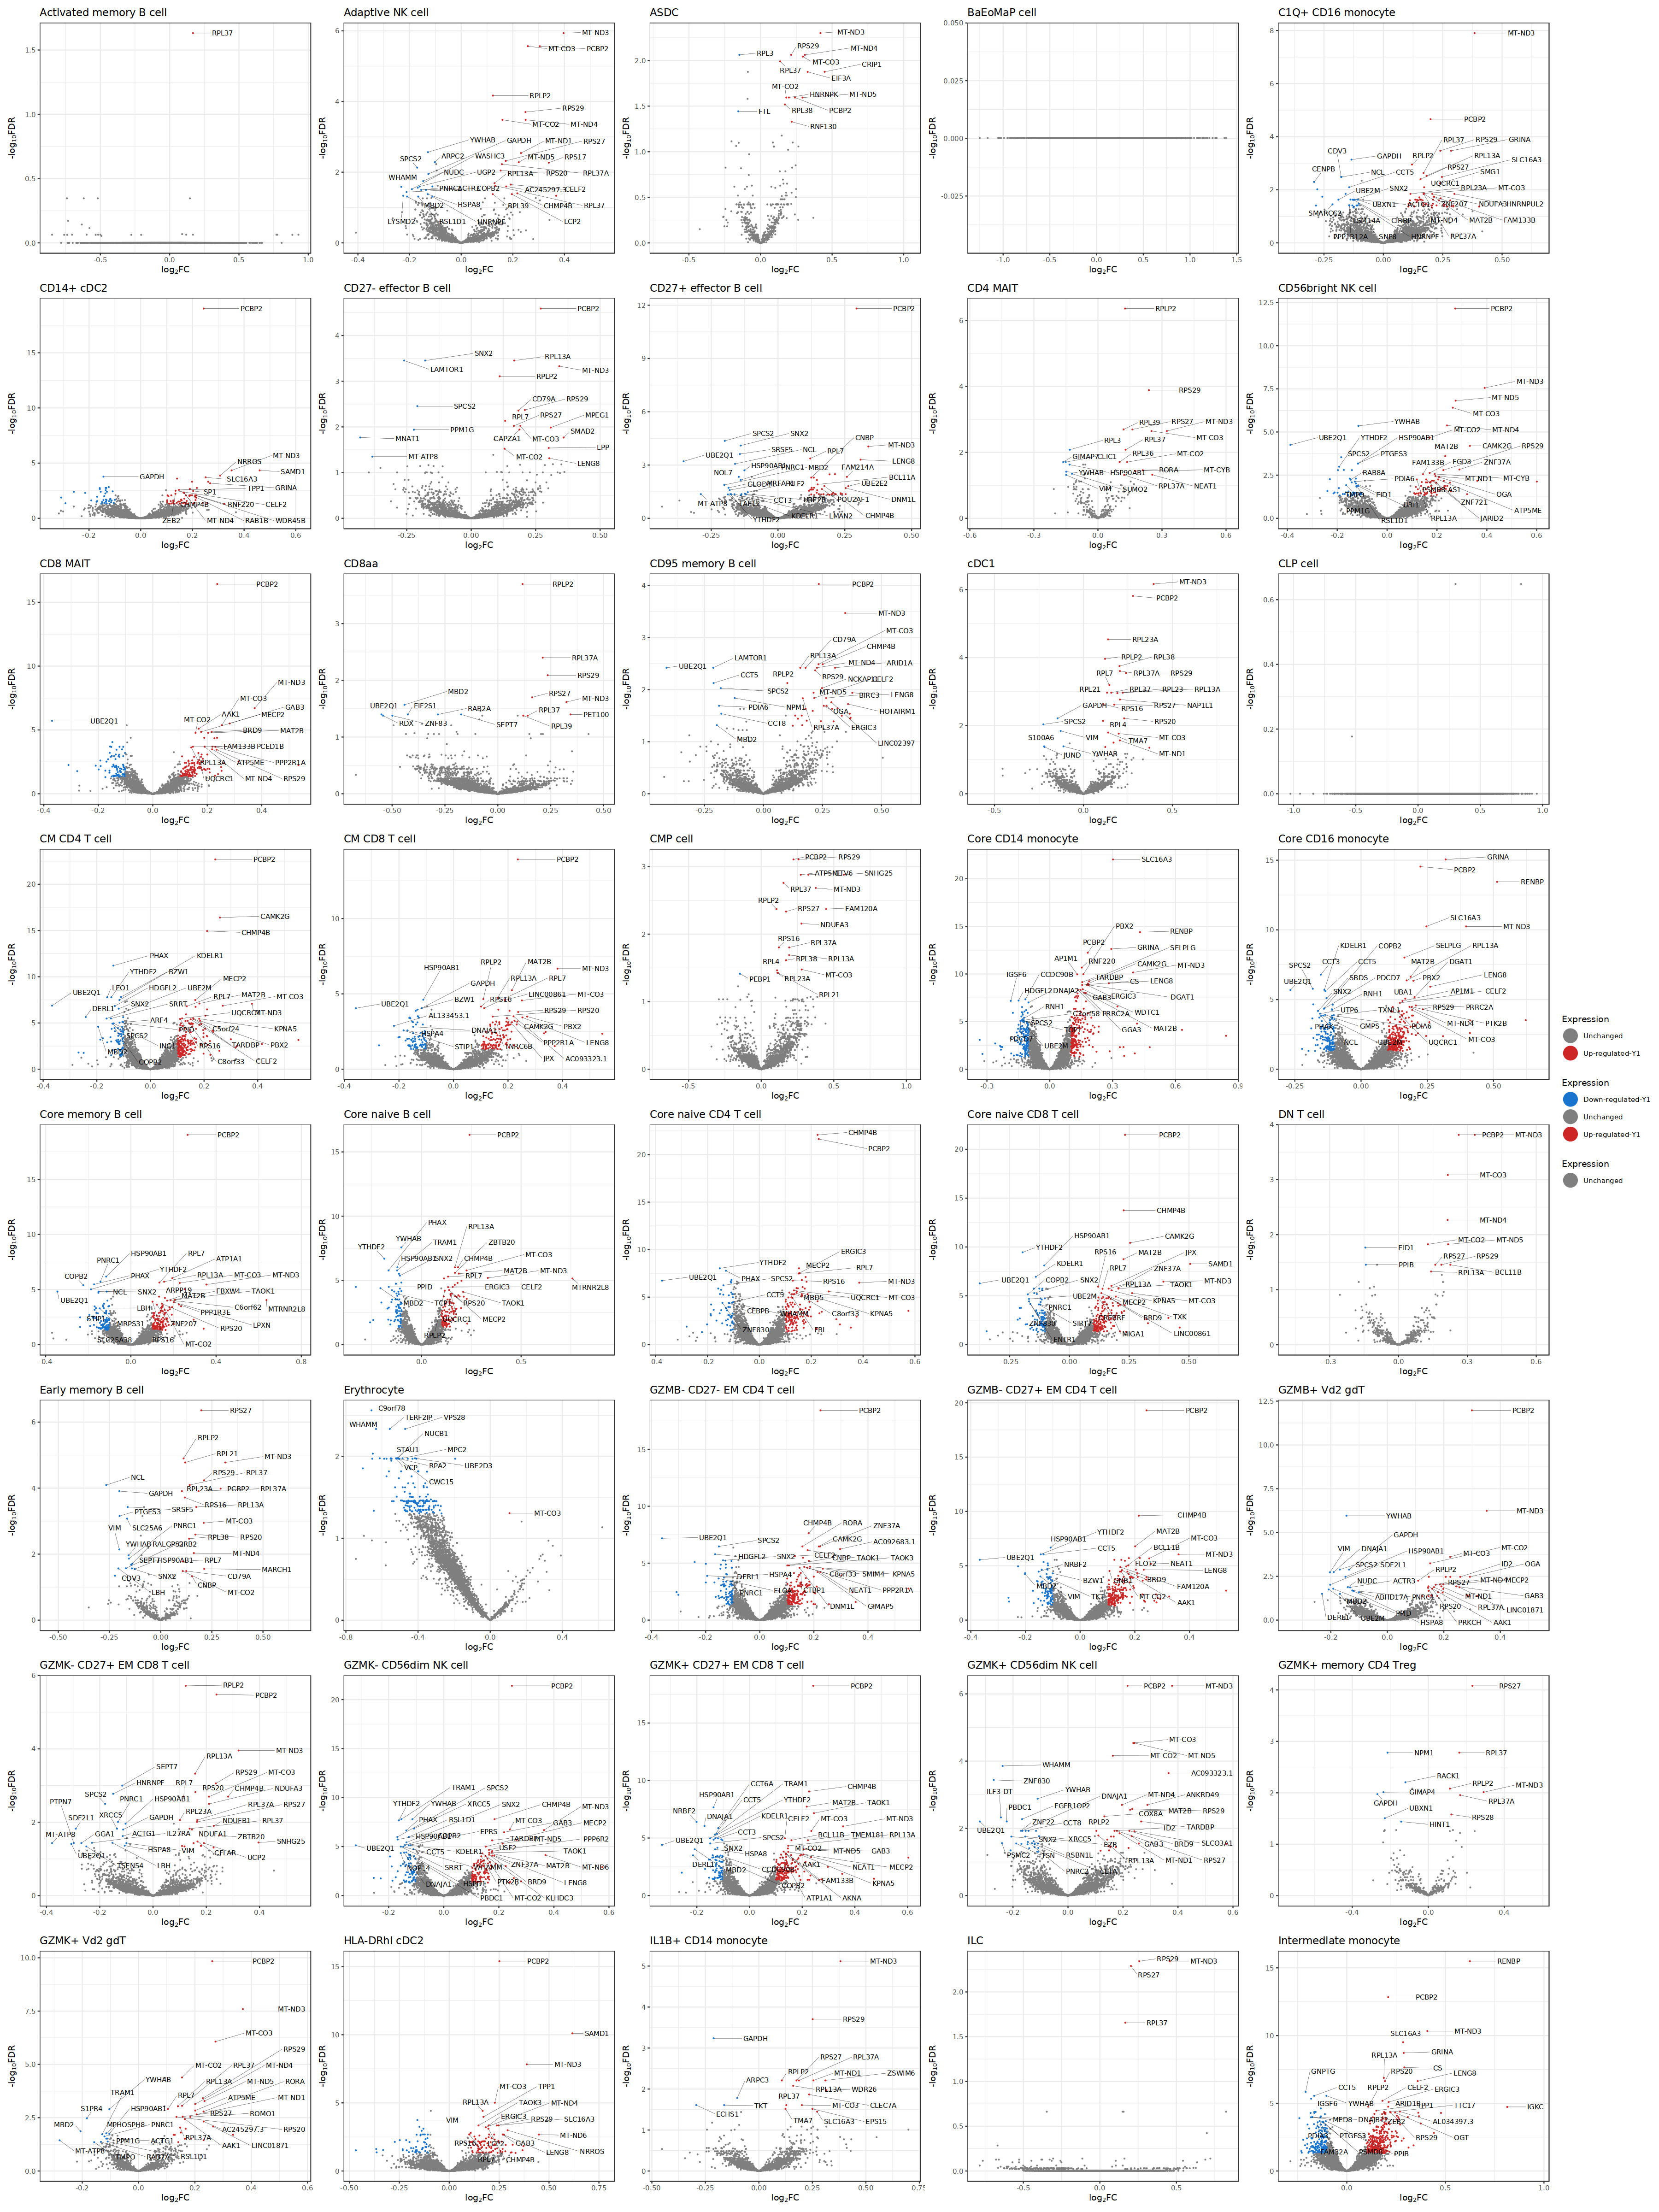

In [87]:
options(repr.plot.width = 30, repr.plot.height = 40)

wrap_plots(Plot_list[1:40],ncol=5)+ plot_layout(guides = "collect")

In [88]:
freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.05 ~ "Up-regulated",
                                                     log2FoldChange <= -0.1 & padj <= 0.05 ~ "Down-regulated",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  group_by(celltype,Expression) %>%
  summarise(count = n())
freq<-freq %>% mutate (count=case_when(Expression=="Down-regulated"~-count,TRUE~count))

`summarise()` has grouped output by 'celltype'. You can override using the
`.groups` argument.


In [89]:
orders<-freq
orders$count<-abs(orders$count)
orders<-orders%>%
  group_by(celltype) %>%
  summarize(value = sum(count))%>%arrange(desc(value)) %>% select (celltype) %>% pull()

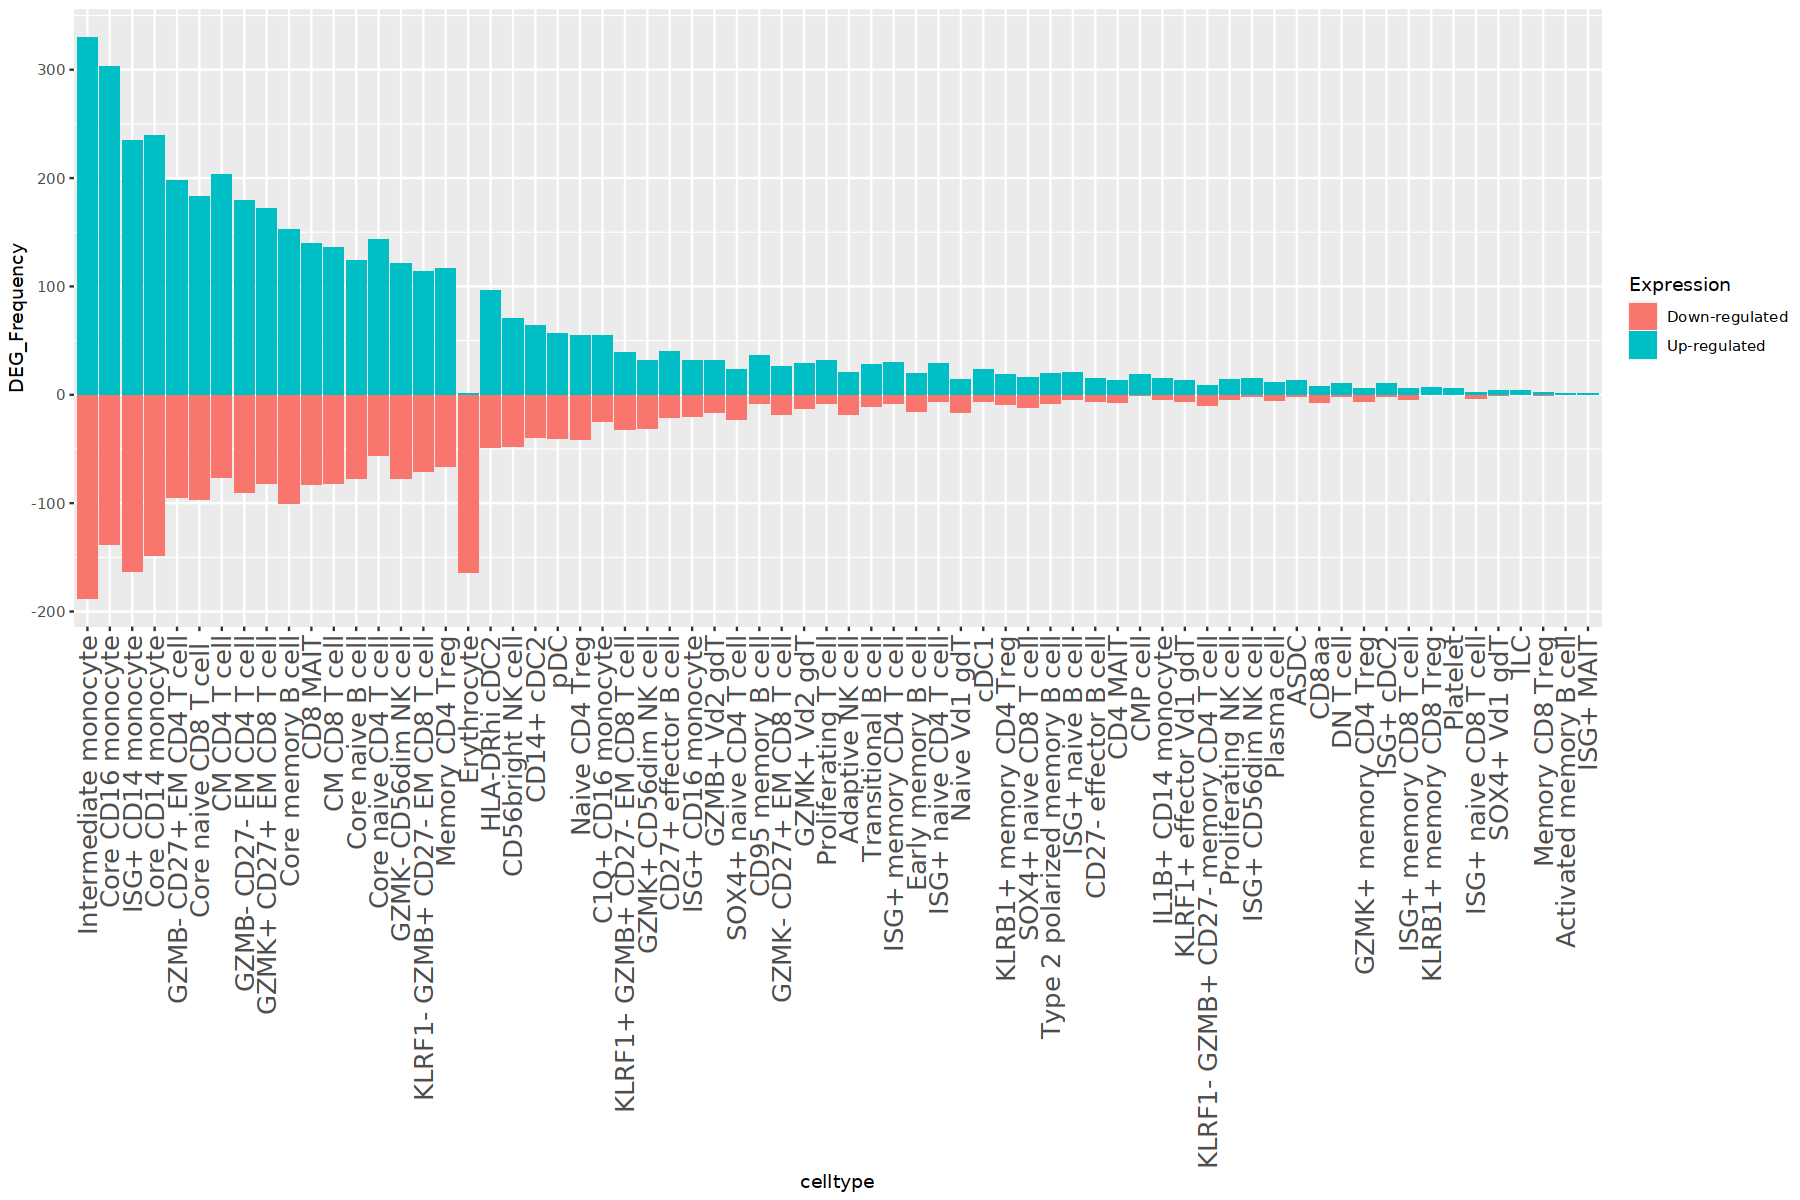

In [90]:
options(repr.plot.width = 15, repr.plot.height = 10)
freq$celltype<-factor(freq$celltype,levels=orders)
ggplot(freq, aes(x = celltype, y = count, fill = Expression)) +
  geom_bar(stat = "identity", position = "identity") +
  labs(x = "celltype", y = "DEG_Frequency") +  
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))


# BR1

In [34]:
Plot_list<-list()
selected_celltype<-unique(DEG$celltype)
for (i in 1:length(selected_celltype)){

data <- DEG %>% filter(celltype==selected_celltype[i],cohort.cohortGuid=="BR2")%>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <=  0.05 ~ "Up-regulated-Y1",
                                                     log2FoldChange <= -0.1 & padj <=  0.05 ~ "Down-regulated-Y1",
                                                     TRUE ~ "Unchanged"))
top <- 20
top_genes <- bind_rows(
  data %>% 
    filter(Expression == 'Up-regulated-Y1') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top),
  data %>% 
    filter(Expression == 'Down-regulated-Y1') %>% 
    arrange(padj, desc(abs(log2FoldChange))) %>% 
    head(top)
)
    
Plot_list[[selected_celltype[i]]]<-ggplot(data, aes(log2FoldChange, -log(padj,10))) +
  geom_point(aes(color = Expression), size =0.1) +
  xlab(expression("log"[2]*"FC")) + 
  ylab(expression("-log"[10]*"FDR")) +
  scale_color_manual(values = c("Down-regulated-Y1"="dodgerblue3", "Unchanged"="gray50", "Up-regulated-Y1"="firebrick3")) +
  guides(colour = guide_legend(override.aes = list(size=8))) +
  geom_text_repel(data = top_genes,box.padding = 0.5,force= 0.5,max.overlaps=15,
    nudge_x           = 0.15,
    hjust             = 0.1,
    segment.size      = 0.1,
                   mapping = aes(log2FoldChange, -log(padj,10), label = X),
                   size = 3)+ ggtitle(selected_celltype[i])+theme_bw(base_size=11)

}

In [33]:
options(repr.plot.width = 30, repr.plot.height = 40)

wrap_plots(Plot_list[1:40],ncol=5)+ plot_layout(guides = "collect")

ERROR: [1m[33mError[39m in `wrap_plots()`:[22m
[1m[22m[33m![39m Only know how to add [34m<ggplot>[39m and/or [34m<grob>[39m objects


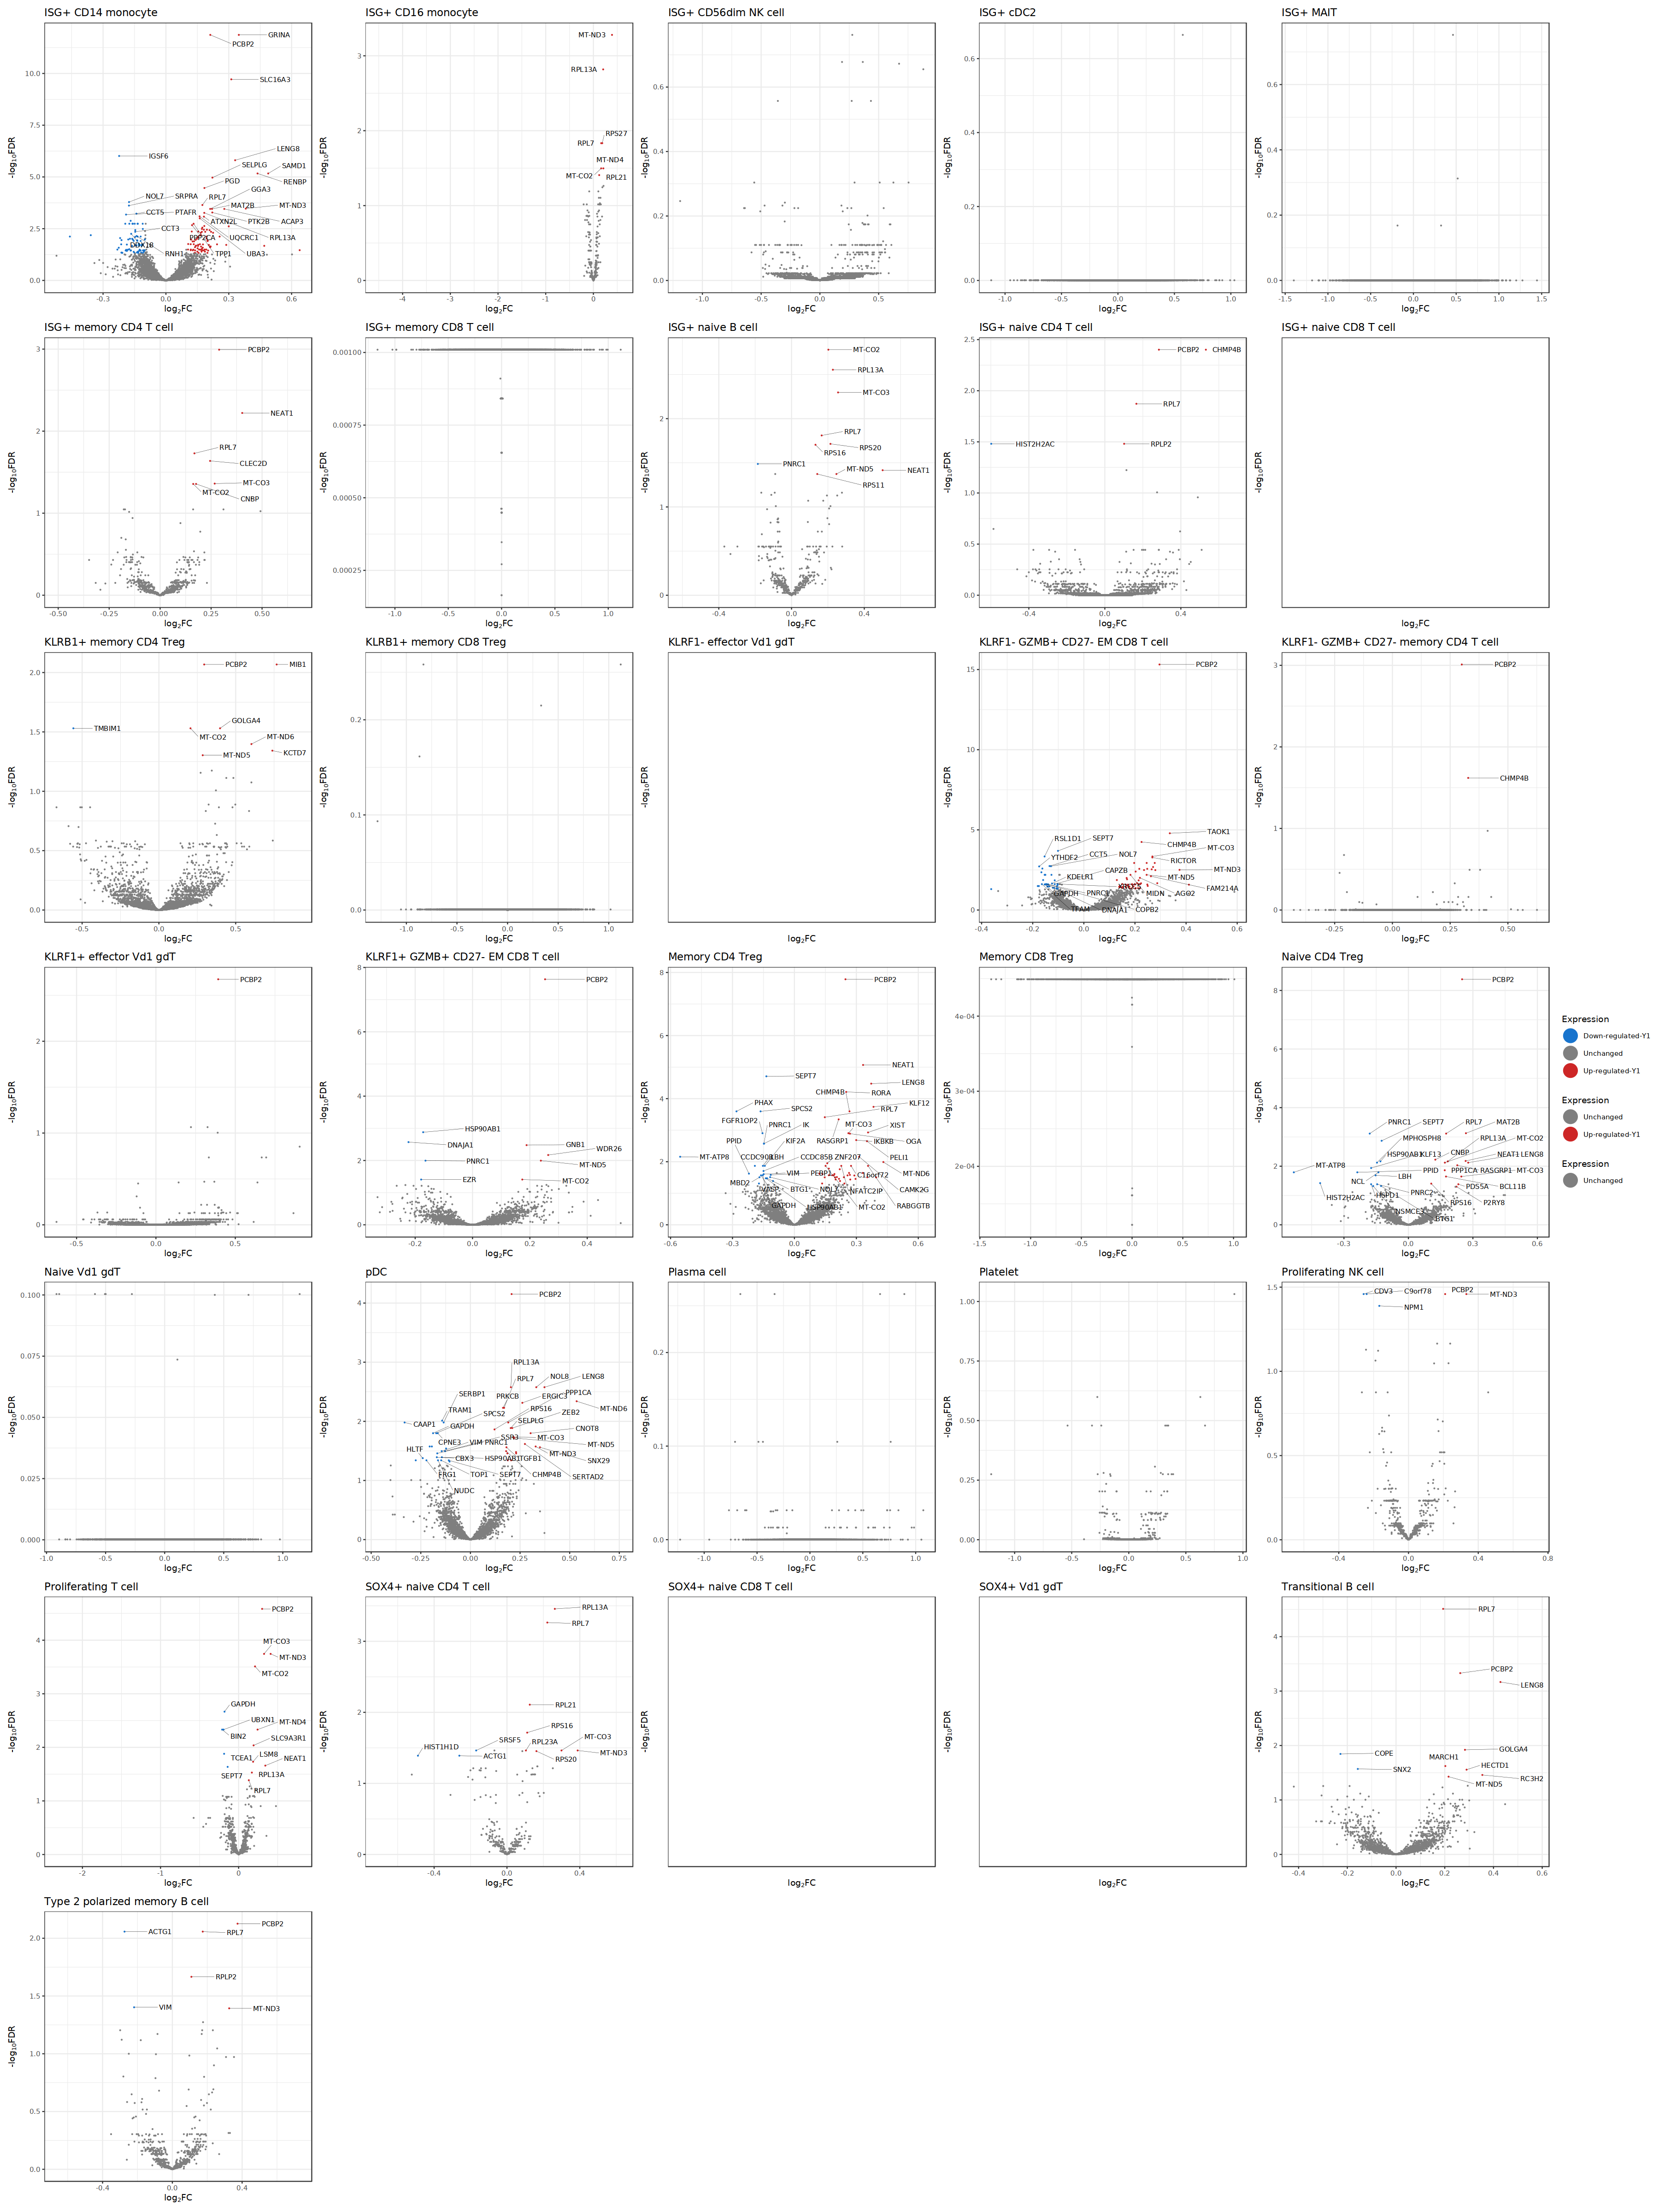

In [27]:
options(repr.plot.width = 30, repr.plot.height = 40)

wrap_plots(Plot_list[41:71],ncol=5)+ plot_layout(guides = "collect")



In [58]:
freq <- DEG %>% mutate(Expression = case_when(log2FoldChange >=0.1 & padj <= 0.05 ~ "Up-regulated",
                                                     log2FoldChange <= -0.1 & padj <= 0.05 ~ "Down-regulated",
                                                     TRUE ~ "Unchanged")) %>% filter(!Expression=='Unchanged')%>%
  group_by(celltype,Expression,cohort.cohortGuid) %>%
  summarise(count = n())
freq<-freq %>% mutate (count=case_when(Expression=="Down-regulated"~-count,TRUE~count))

`summarise()` has grouped output by 'celltype', 'Expression'. You can override
using the `.groups` argument.


In [59]:
orders<-freq
orders$count<-abs(orders$count)
orders<-orders%>%
  group_by(celltype) %>%
  summarize(value = sum(count))%>%arrange(desc(value)) %>% select (celltype) %>% pull()

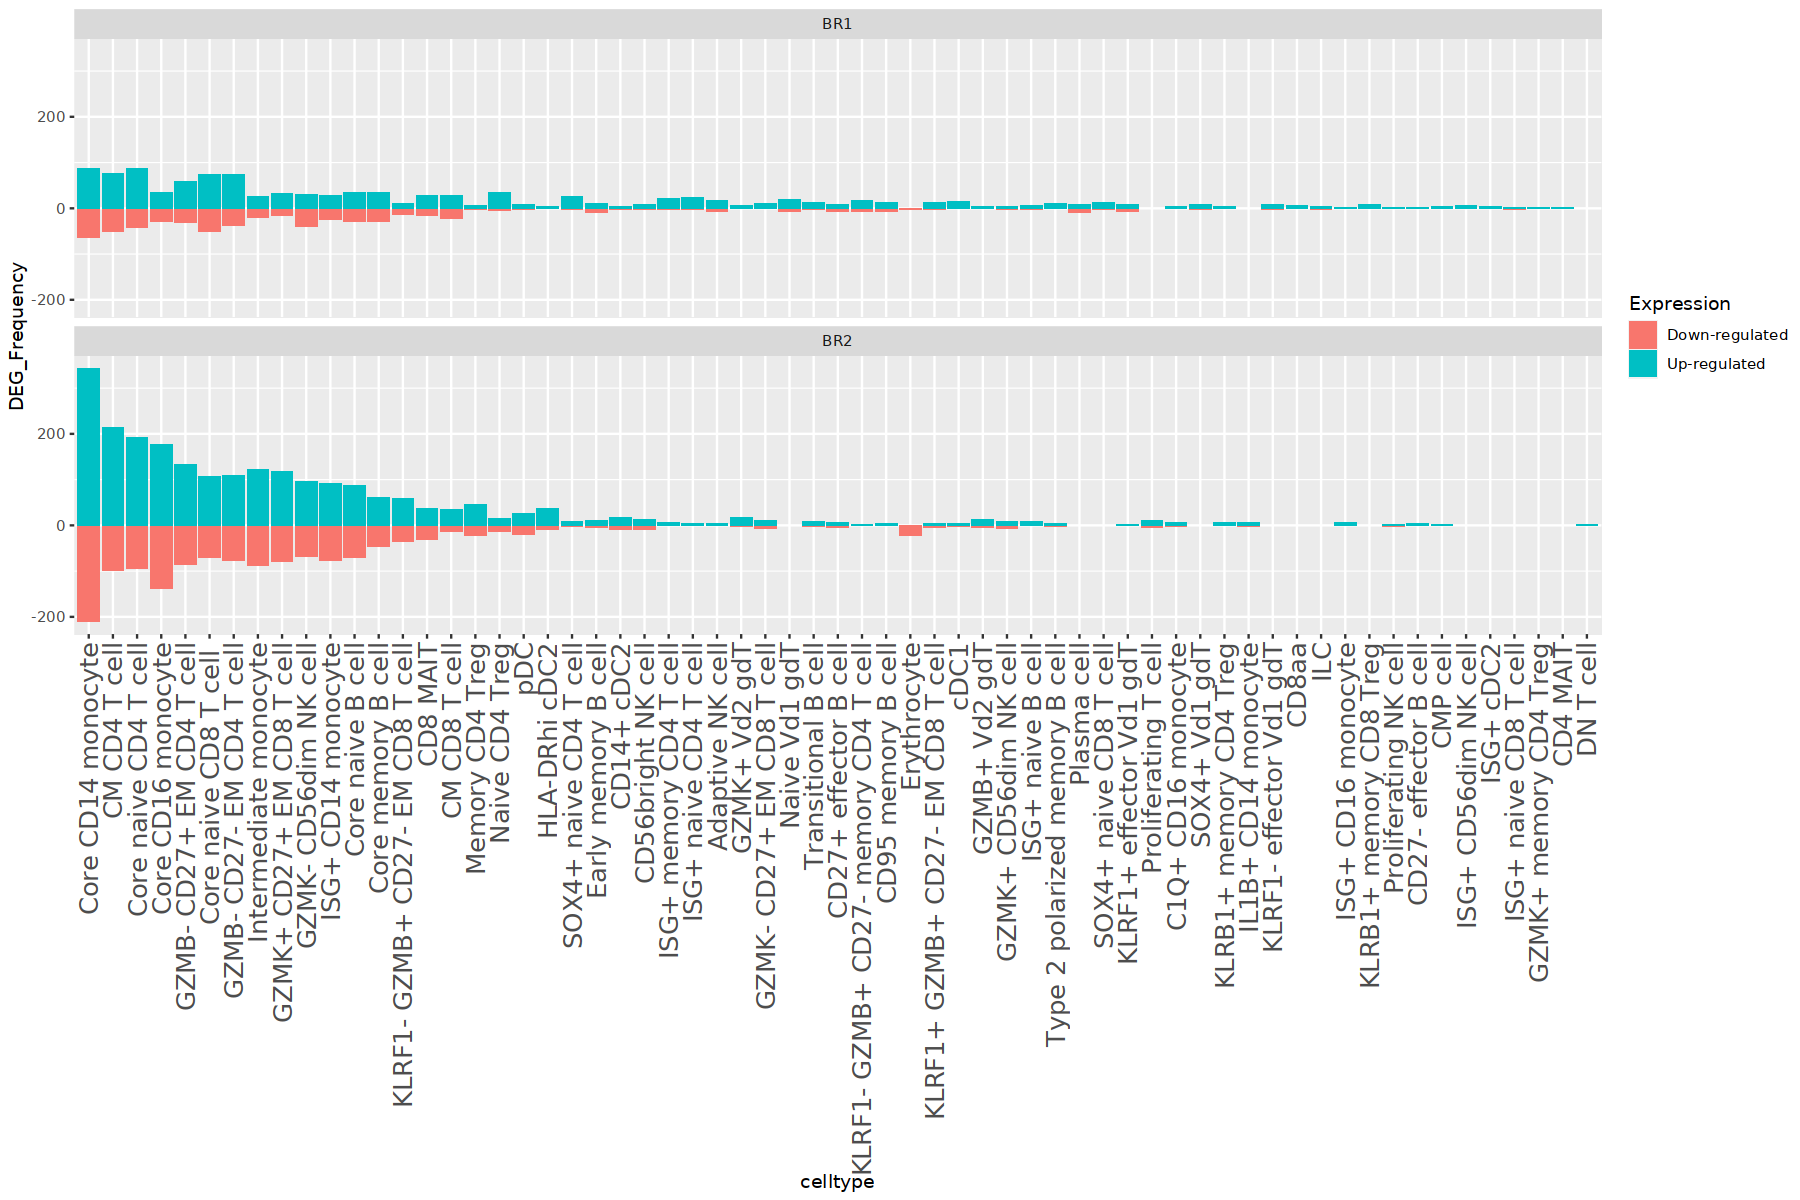

In [66]:
options(repr.plot.width = 15, repr.plot.height = 10)
#orders<-unique(freq %>% arrange(desc(count)) %>% select (celltype) %>% pull())
freq$celltype<-factor(freq$celltype,levels=orders)
ggplot(freq, aes(x = celltype, y = count, fill = Expression)) +
  geom_bar(stat = "identity", position = "identity") +
  labs(x = "celltype", y = "DEG_Frequency") +  
theme(axis.text.x = element_text(angle = 90, hjust = 1, vjust = 0.5, size = 15))+facet_wrap(~cohort.cohortGuid,ncol=1)